### РК2 Вариант 5 Гасанов А.Ш. ИУ5-62Б

#### Задание
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

### Методы построения моделей машинного обучения.

Колонки:
- age
- sex
- cp
- trestbps
- chol
- fbs
- restecg
- thalach
- exang
- oldpeak
- slope
- ca
- thal
- target

Resting blood pressure (trestbps) является целевым признаком.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('heart.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(303, 14)

In [4]:
# типы колонок
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

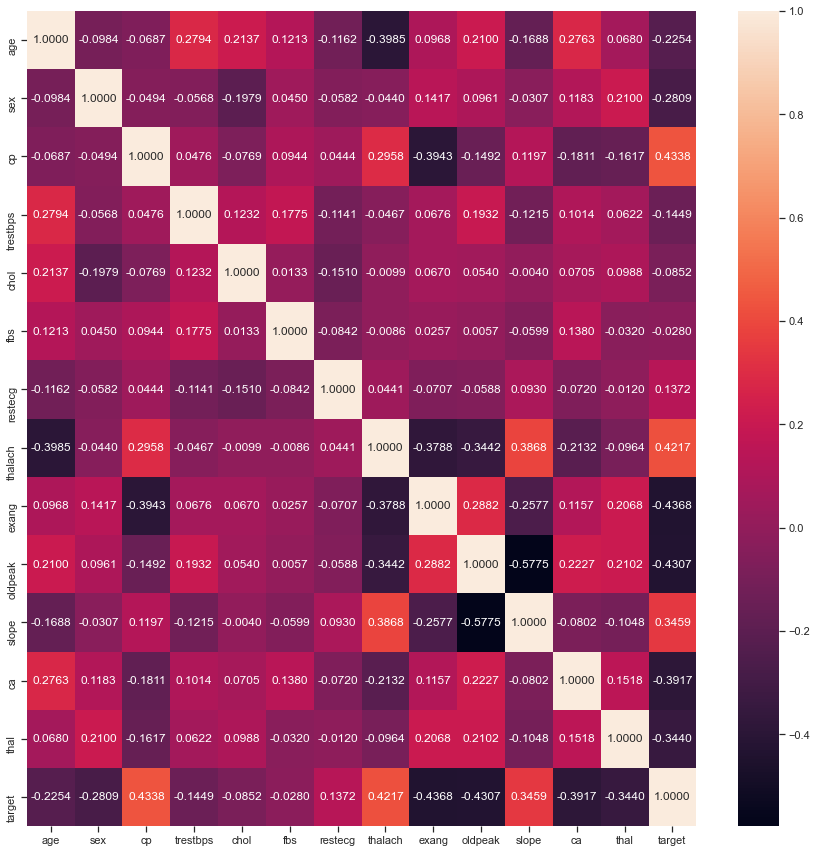

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, fmt='.4f')

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Метод опорных векторов: визуализация

In [11]:
data_x = data['oldpeak'].values
data_y = data['trestbps'].values

<AxesSubplot:>

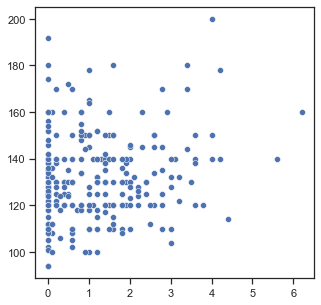

In [12]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x=data_x, y=data_y)

In [13]:
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(data_x.reshape(-1, 1), data_y)
    data_y_pred = clf.predict(data_x.reshape(-1, 1))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(data_x, data_y, 'b.')
    ax.plot(data_x, data_y_pred, 'ro')
    plt.show()

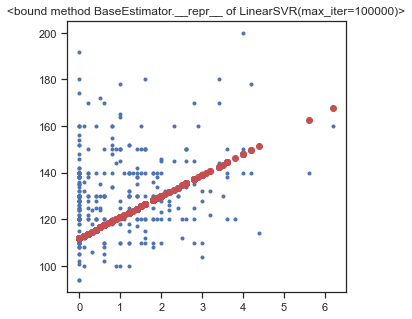

In [14]:
plot_regr(LinearSVR(C=1.0, max_iter=100000))

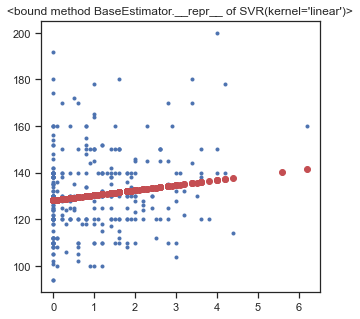

In [15]:
plot_regr(SVR(kernel='linear', C=1.0))

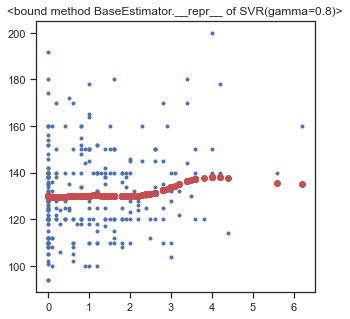

In [16]:
plot_regr(SVR(kernel='rbf', gamma=0.8, C=1.0))

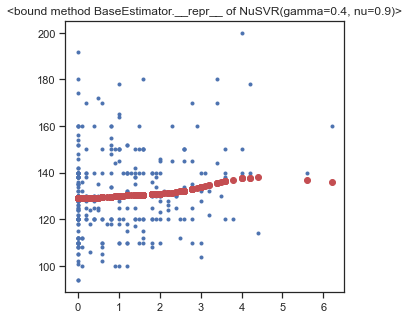

In [17]:
plot_regr(NuSVR(kernel='rbf', gamma=0.4, nu=0.9, C=1.0))

### Масштабирование данных

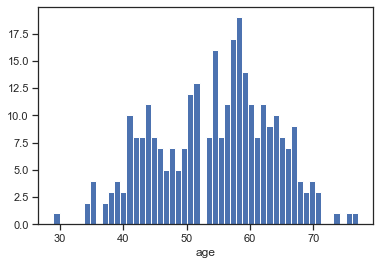

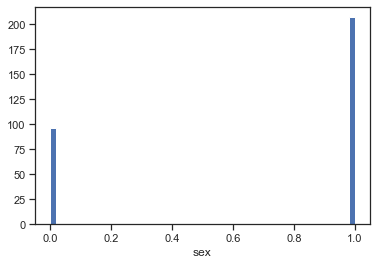

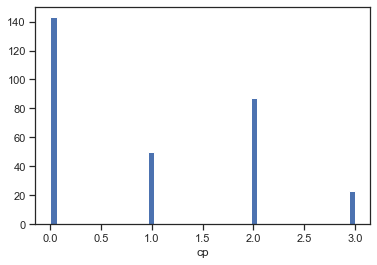

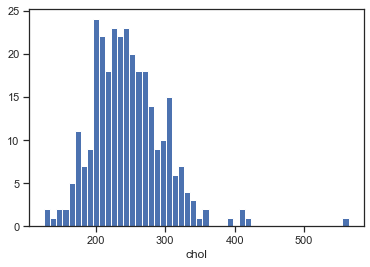

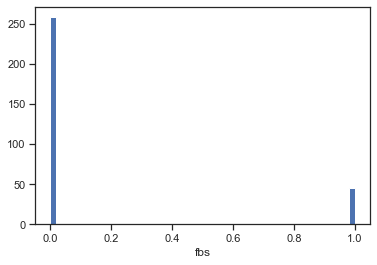

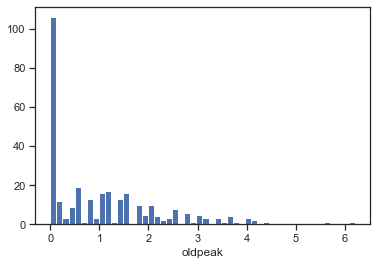

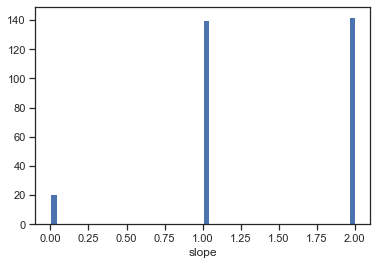

In [18]:
# Гистограмма по признакам
num_col = ['age', 'sex','cp', 'chol', 'fbs', 'oldpeak', 'slope']
for col in num_col:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [19]:
# Масштабирование данных в диапазоне от 0 до 1
sc1 = MinMaxScaler()
for item in num_col:
    data.loc[:,item]=sc1.fit_transform(data[[item]])

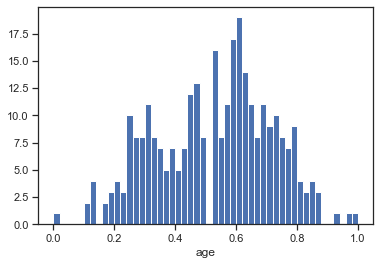

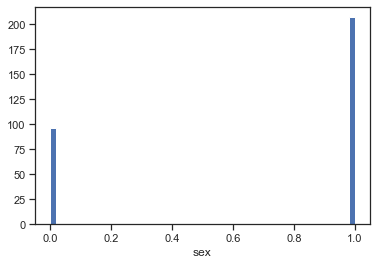

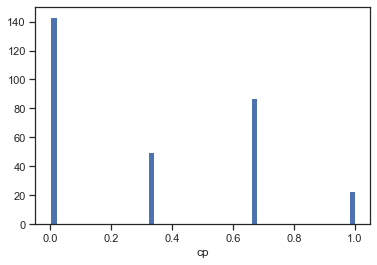

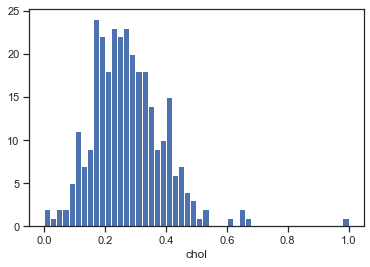

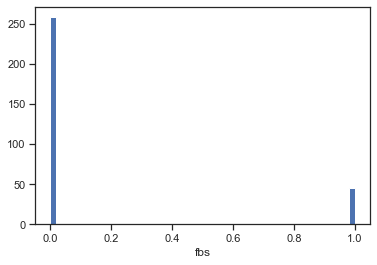

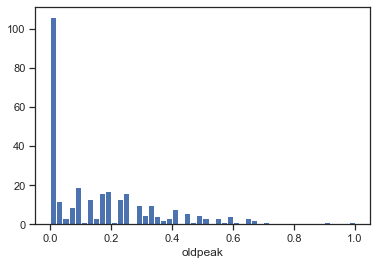

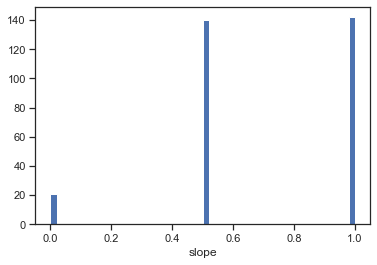

In [20]:
for col in data[num_col]:
    plt.hist(data[col],50)
    plt.xlabel(col)
    plt.show()

### Выбор класса для задачи регрессии метода опорных векторов

In [21]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data[num_col], data['trestbps'], test_size=0.5, random_state=1)

data_X_train.shape, data_X_test.shape

((151, 7), (152, 7))

In [22]:
svr_1 = SVR()
svr_1.fit(data_X_train, data_y_train)

SVR()

In [23]:
data_y_pred = svr_1.predict(data_X_test)

In [24]:
mean_absolute_error(data_y_test, data_y_pred), mean_squared_error(data_y_test, data_y_pred)

(12.8290368813089, 294.3273928111727)

In [25]:
nusvr_1 = NuSVR(gamma=0.4, nu=0.9, C=1.0)
nusvr_1.fit(data_X_train, data_y_train)

NuSVR(gamma=0.4, nu=0.9)

In [26]:
data_y_pred = nusvr_1.predict(data_X_test)

In [27]:
mean_absolute_error(data_y_test, data_y_pred), mean_squared_error(data_y_test, data_y_pred)

(12.759473516552555, 294.15998792943026)

Для построения модели будем использовать NuSVR(gamma=0.4, nu=0.9), т.к. меньшие средние абсолютная и квадратичная ошибки по сравнению с SVR().

### Построение моделей регрессии и оценка качеств моделей

In [28]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0, a, str(round(b,4)), color='black')
    plt.show()

In [29]:
# Качество отдельных моделей
def val_mae(model, array_mae, array_mse, array_r2):
    model.fit(data_X_train, data_y_train)
    data_y_pred = model.predict(data_X_test)
    result = mean_absolute_error(data_y_test, data_y_pred)
    result1 = mean_squared_error(data_y_test, data_y_pred)
    result2 = r2_score(data_y_test, data_y_pred)
    print(model)
    print('mean_absolute_error={}'.format(result))
    print('mean_squared_error={}'.format(result1))
    print('r2_score={}'.format(result2))
    array_mae += [result]
    array_mse += [result1]
    array_r2 += [result2]

In [30]:
array_labels = ['NuSVR','RandomForestRegressor']

In [31]:
array_mae =[]
array_mse =[]
array_r2 =[]
# Точность на отдельных моделях
for model in [
    NuSVR(kernel='rbf', gamma=0.4, nu=0.9, C=1.0),
    RandomForestRegressor()
]:
    val_mae(model, array_mae, array_mse, array_r2)
    print('==========================')
    print()

NuSVR(gamma=0.4, nu=0.9)
mean_absolute_error=12.759473516552555
mean_squared_error=294.15998792943026
r2_score=-0.018226110418504193

RandomForestRegressor()
mean_absolute_error=14.180197368421052
mean_squared_error=323.45503618421054
r2_score=-0.11963005474468957



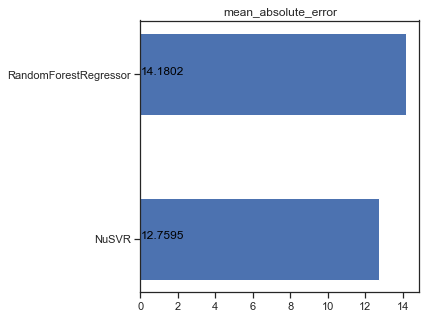

In [32]:
# Визуализация результатов
vis_models_quality(array_mae, array_labels, 'mean_absolute_error')

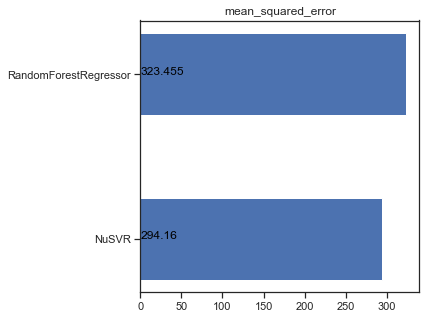

In [33]:
# Визуализация результатов
vis_models_quality(array_mse, array_labels, 'mean_squared_error')

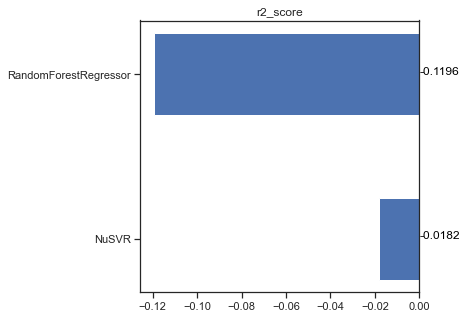

In [34]:
# Визуализация результатов
vis_models_quality(array_r2, array_labels, 'r2_score')

### Выводы

Модель RandomForestRegressor (случайный лес) имеет лучшие показатели: средние абсолютная и квадратичная ошибки меньше чем у модели NuSVR (метод опорных векторов).